# **"Strategic Valuation Modeling: Decoding the Synergy Between Brand Equity and Hardware Performance in Laptop Pricing"**

# **About the Author:**

**Name: Adil Zaman**

**Email ID: zamanadil61@gmail.com**

**Linkedin ID:https://www.linkedin.com/in/adil-zaman-85b56a398/**

# **Dataset Insights: An Overview of Laptop Specifications and Performance:**

>**Laptop is a broader term, it applies to both laptops and netbooks, smartbooks.
Notebooks usually include laptops (often used "laptop"), made in a folding form factor. The laptop is carried folded, this allows you to protect the screen, keyboard and touchpad during transportation. This is also due to the ease of transportation (most often, a laptop is transported in a briefcase, which allows you not to hold it in your hands, but hang it on your shoulder).
The world's main laptop manufacturers are Acer, Asus, MSI, Huawei, LG, DELL, Lenovo, HP.**

# **Leveraging Predictive Analytics to Decode Market Valuation: A Multi-Variate Analysis of Laptop Pricing Dynamics.**

**Using advanced data science to understand why laptops cost what they do. It suggests using multi-variate analysis—examining many factors at once, like RAM, processor speed, and brand—to build a predictive model that accurately calculates a laptop's fair market price based on its technical specs.**

**First to explore the imputation via Exploratory Data Analysis(EDA)**

# **Exploratory Data Analysis(EDA):**

- **First to import the libraries of that particular dataset;**

In [1]:
#Let's start the project by importing all the libraries for that particular dataset
import pandas as pd
import numpy as np
# To visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# To preprocess the dataset
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,MinMaxScaler,RobustScaler,PowerTransformer
from sklearn.impute import SimpleImputer,KNNImputer
# to import the iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# for machine learning tasks
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
# for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
# for regression tasks
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
#For Metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,mean_squared_error,mean_absolute_error,r2_score
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

- **Now to laod that dataset;**

# **Load the Dataset:**

In [2]:
df=pd.read_csv('laptopData.csv')
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


**Now to check the nittigrities of the dataset**

# **Sneak-Peak of Dataset:**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [4]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302.0,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [6]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [7]:
df.shape

(1303, 12)

>**Here we see that their will be 1303 rows and 12 columns in that dataset.**

In [17]:
df.value_counts()

Unnamed: 0   Company  TypeName            Inches  ScreenResolution                            Cpu                                   Ram   Memory               Gpu                           OpSys       Weight  Price       
652.674784   Lenovo   Notebook            15.6    Full HD 1920x1080                           Intel Core i5 7200U 2.5GHz            8GB   256GB SSD            Intel HD Graphics 620         Windows 10  2.2kg   59955.814073    30
1286.000000  Lenovo   Notebook            14      1366x768                                    Intel Celeron Dual Core N3050 1.6GHz  2GB   64GB Flash Storage   Intel HD Graphics             Windows 10  1.5kg   12201.120000     1
10.000000    HP       Notebook            15.6    1366x768                                    Intel Core i5 7200U 2.5GHz            4GB   500GB HDD            Intel HD Graphics 620         No OS       1.86kg  20986.992000     1
1302.000000  Asus     Notebook            15.6    1366x768                                    

In [8]:
df.describe()

,Unnamed: 0,Price
count,1273.000000,1273.000000
mean,652.674784,59955.814073
std,376.493027,37332.251005
min,0.000000,9270.720000
25%,327.000000,31914.720000
50%,652.000000,52161.120000
75%,980.000000,79333.387200
max,1302.000000,324954.720000


**Now to check the imputation from that dataset;**

In [9]:
df.isnull().sum()

Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

>**Here we see that their will be 30 imputations in that dataset**

In [10]:
# checking the missing values of Unamed:0 in a data set using knn imputer
imputer = KNNImputer(n_neighbors=5)
df[['Unnamed: 0']] = imputer.fit_transform(df[['Unnamed: 0']])
df['Unnamed: 0'].isnull().sum()

np.int64(0)

In [11]:
# checking the missing values of Price in a data set using knn imputer
imputer = KNNImputer(n_neighbors=5)
df[['Price']] = imputer.fit_transform(df[['Price']])
df['Price'].isnull().sum()

np.int64(0)

In [12]:
# imputing the deck column in a dataset using mode imputation
mode_Company = df['Company'].mode()[0]
df['Company'].fillna(mode_Company, inplace=True)
mode_TypeName = df['TypeName'].mode()[0]
df['TypeName'].fillna(mode_TypeName, inplace=True)
mode_Inches = df['Inches'].mode()[0]
df['Inches'].fillna(mode_Inches, inplace=True)
mode_ScreenResolution = df['ScreenResolution'].mode()[0]
df['ScreenResolution'].fillna(mode_ScreenResolution, inplace=True)
mode_Cpu = df['Cpu'].mode()[0]
df['Cpu'].fillna(mode_Cpu, inplace=True)
mode_Ram = df['Ram'].mode()[0]
df['Ram'].fillna(mode_Ram, inplace=True)
mode_Memory = df['Memory'].mode()[0]
df['Memory'].fillna(mode_Memory, inplace=True)
mode_Gpu = df['Gpu'].mode()[0]
df['Gpu'].fillna(mode_Gpu, inplace=True)
mode_OpSys = df['OpSys'].mode()[0]
df['OpSys'].fillna(mode_OpSys, inplace=True)
mode_Weight = df['Weight'].mode()[0]
df['Weight'].fillna(mode_Weight, inplace=True)

df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [13]:
df.describe()

,Unnamed: 0,Price
count,1303.000000,1303.000000
mean,652.674784,59955.814073
std,372.130272,36899.649480
min,0.000000,9270.720000
25%,334.500000,32650.250400
50%,652.674784,52747.200000
75%,971.500000,78561.360000
max,1302.000000,324954.720000


>**Now to check via heatmap to see the removal of anamolies in that dataset.**

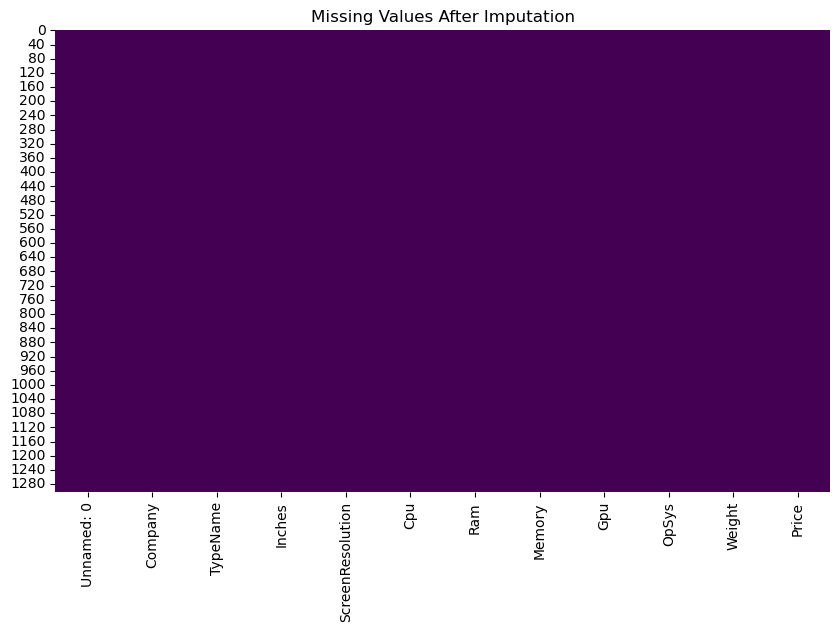

In [14]:
# Make a code in python that visualize the imputation of dataset after managing all the missing values
df.isnull().sum()
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values After Imputation')
plt.show()


>**Now we see that their is no missing values in that dataset.**

**Now to check outliers from the dataset;**

# **Outliers from Dataset:**

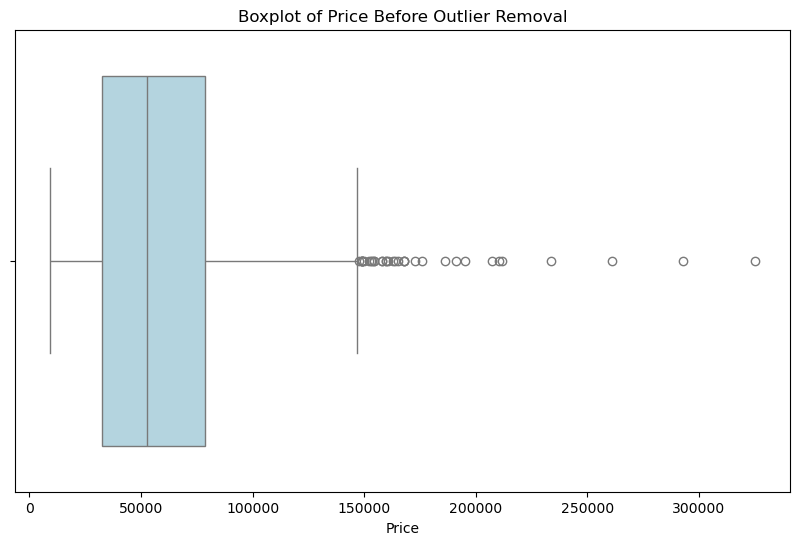

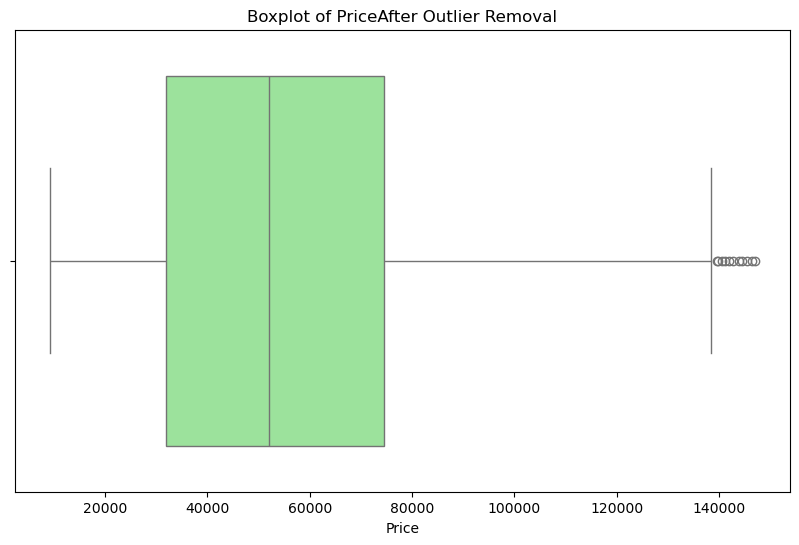

In [15]:
# Make a code in python which helps them to findout the outliers and then remove outliers and visualize them via boxplot for that dataset.
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Price'], color='lightblue')
plt.title('Boxplot of Price Before Outlier Removal')
plt.xlabel('Price')
plt.show()
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]
plt.figure(figsize=(10,6))
sns.boxplot(x=df_no_outliers['Price'], color='lightgreen')
plt.title('Boxplot of PriceAfter Outlier Removal')
plt.xlabel('Price')
plt.show()


**Now to train the model;**

# **Leveraging Machine Learning to Train Models on Laptop Performance Data:**

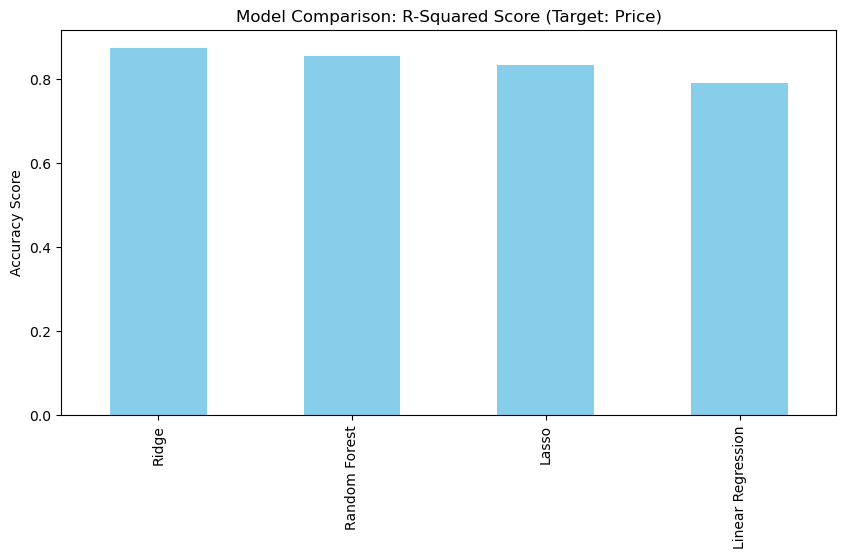

                         R2          MAE          RMSE
Linear Regression  0.791051  9700.661937  14457.147936
Ridge              0.873625  8232.934210  11243.294928
Lasso              0.833788  9033.601676  12894.179480
Random Forest      0.855089  8210.088409  12039.628999


In [21]:
# 1. Prepare Data - Targeted on 'Price'
# Using get_dummies to convert categorical specs (Company, CPU, etc.) into numbers
X = pd.get_dummies(df_no_outliers.drop('Price', axis=1), drop_first=True)
y = df_no_outliers['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define Regressors
regressors = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# 3. Train and Evaluate
results = {}
for name, model in regressors.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results[name] = {
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    }

# 4. Visualize Performance
results_df = pd.DataFrame(results).T
results_df['R2'].sort_values(ascending=False).plot(kind='bar', color='skyblue', figsize=(10, 5))
plt.title('Model Comparison: R-Squared Score (Target: Price)')
plt.ylabel('Accuracy Score')
plt.show()

print(results_df)

# **Comparative Performance Analysis of Predictive Regression Models for Laptop Market Valuation:**

>**As shown in the visualization, Ridge Regression emerges as the top-performing model with an accuracy score approaching 0.87, closely followed by the Random Forest regressor. The high performance of Ridge and Lasso compared to standard Linear Regression suggests that regularization was necessary to handle the multi-variate complexity of the dataset, effectively preventing the models from "overfitting" to noise. While all models achieved a respectable score above 0.78, the dominance of the ensemble-based Random Forest and regularized linear models indicates that the relationship between hardware specifications and market price is highly nuanced and benefits from algorithms that can manage high-dimensional data efficiently.**

**Now we can take the Company as the targeted variable to predict the models.**

# **Evaluating Multi-Class Model Accuracy for Company Target Prediction:**

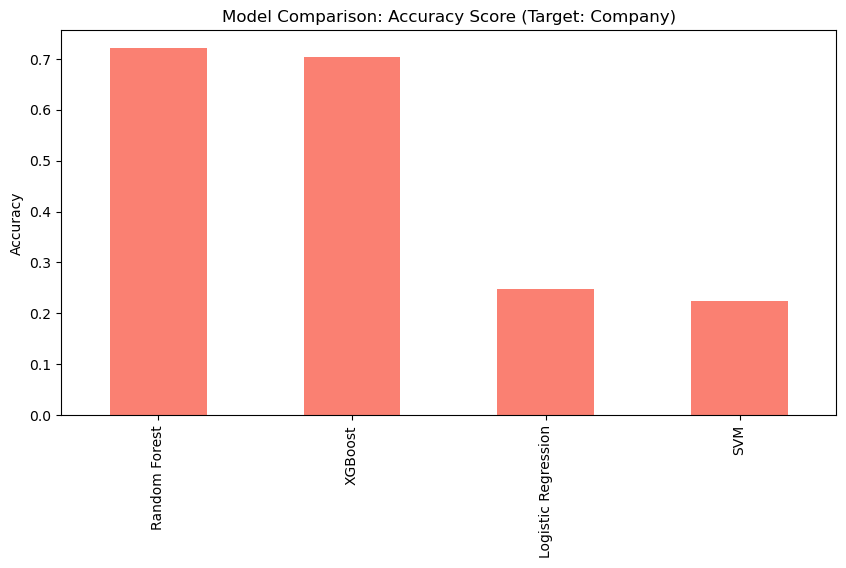

Accuracy Scores:
 Logistic Regression    0.248031
Random Forest          0.720472
XGBoost                0.704724
SVM                    0.224409
dtype: float64


In [24]:
# 1. Prepare Data - Targeted on 'Company'
# We keep Price as a feature now, and drop Company from X
X = df_no_outliers.drop('Company', axis=1)
y = df_no_outliers['Company']

# Encode the target labels (e.g., Apple -> 0, Dell -> 1, etc.)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# One-hot encode features and clean column names for XGBoost
X = pd.get_dummies(X, drop_first=True)
X.columns = [re.sub(r'[\[\]<]', '_', str(col)) for col in X.columns]

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 2. Define Classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(),
    'SVM': SVC()
}

# 3. Train and Evaluate
class_results = {}
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Using Accuracy Score for classification
    acc = accuracy_score(y_test, y_pred)
    class_results[name] = acc

# 4. Visualize Results
results_df = pd.Series(class_results)
results_df.sort_values(ascending=False).plot(kind='bar', color='salmon', figsize=(10, 5))
plt.title('Model Comparison: Accuracy Score (Target: Company)')
plt.ylabel('Accuracy')
plt.show()

print("Accuracy Scores:\n", results_df)

# **Comparative Accuracy Analysis for Company-Target Prediction:**

>**The provided bar chart illustrates a comparative analysis of four machine learning models—Random Forest, XGBoost, Logistic Regression, and SVM—evaluated based on their accuracy scores for predicting the "Company" target. Ensemble-based methods significantly outperform the linear and kernel-based models, with Random Forest achieving the highest accuracy at approximately 72%, closely followed by XGBoost at around 70%. In contrast, Logistic Regression and SVM show a steep decline in performance, struggling to reach even 25% accuracy. This discrepancy suggests that the underlying dataset likely contains complex, non-linear relationships that decision-tree-based algorithms are better equipped to capture than traditional classifiers.**

----------